In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

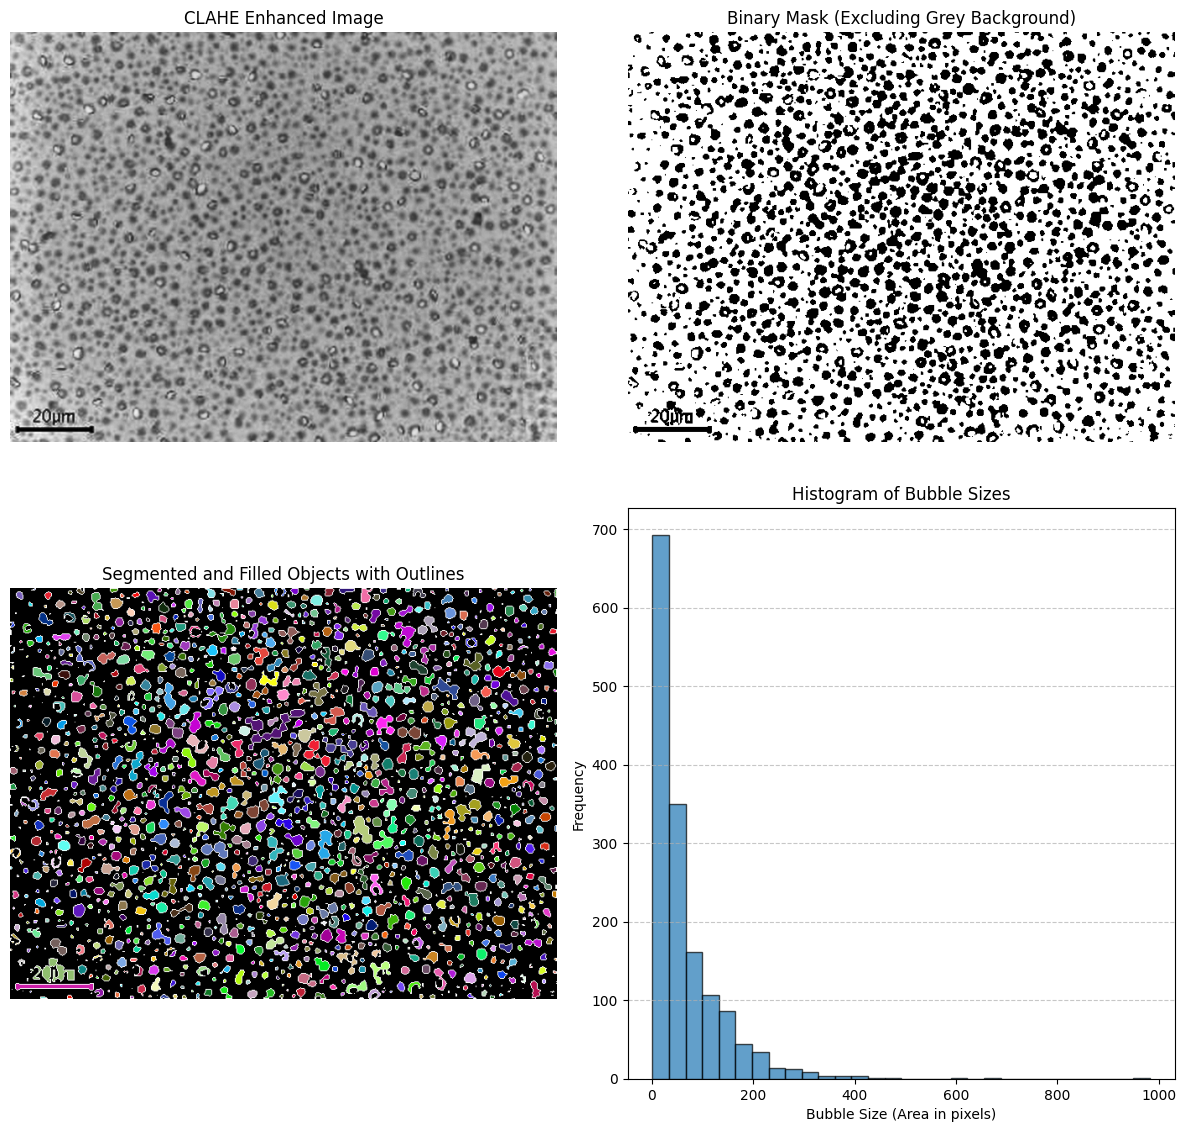

count    1524.000000
mean       63.364173
std        74.813521
min         1.000000
25%        15.750000
50%        38.000000
75%        87.000000
max       982.000000
Name: Area (pixels), dtype: float64


In [2]:
# Load the image
image_path = 'blisters_20um.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Step 2: Create a binary mask using Otsu's thresholding
_, binary_mask = cv2.threshold(clahe_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Segment and fill objects
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(255 - binary_mask, connectivity=8)

# Generate a color map
output_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# Fill enclosed areas in each shape
filled_labels = labels.copy()
for label in range(1, num_labels):
    component_mask = (labels == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(component_mask, contours, -1, 1, thickness=cv2.FILLED)
    filled_labels[component_mask == 1] = label

# Assign colors to each filled shape
output_filled_image = np.zeros((filled_labels.shape[0], filled_labels.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):
    output_filled_image[filled_labels == label] = colors[label]

# Draw outlines
contour_image = output_filled_image.copy()
for label in range(1, num_labels):
    component_mask = (filled_labels == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=1)

# Compute area statistics
region_areas = {label: np.sum(filled_labels == label) for label in range(1, num_labels)}
df_areas = pd.DataFrame(list(region_areas.items()), columns=["Region Label", "Area (pixels)"])

# Step 4: Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Display CLAHE-enhanced image
axes[0, 0].imshow(clahe_image, cmap='gray')
axes[0, 0].set_title("CLAHE Enhanced Image")
axes[0, 0].axis("off")

# Display binary mask
axes[0, 1].imshow(binary_mask, cmap='gray')
axes[0, 1].set_title("Binary Mask (Excluding Grey Background)")
axes[0, 1].axis("off")

# Display segmented and filled objects with outlines
axes[1, 0].imshow(contour_image)
axes[1, 0].set_title("Segmented and Filled Objects with Outlines")
axes[1, 0].axis("off")

# Histogram of bubble sizes
axes[1, 1].hist(df_areas["Area (pixels)"], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel("Bubble Size (Area in pixels)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Histogram of Bubble Sizes")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Step 5: Print summary statistics
summary_stats = df_areas["Area (pixels)"].describe()
print(summary_stats)


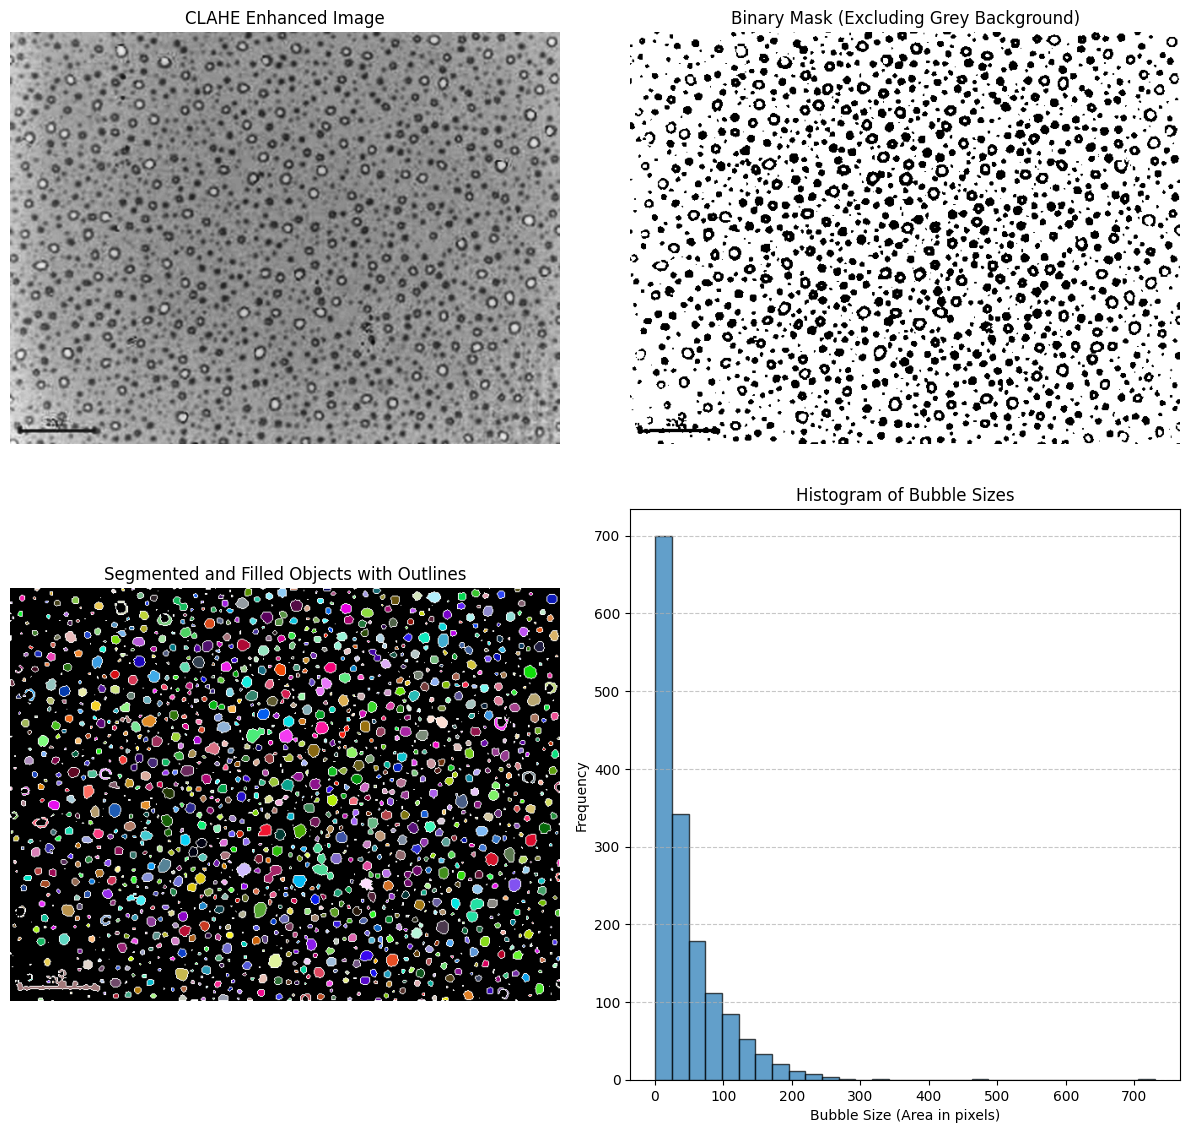

count    1547.000000
mean       46.769877
std        51.969416
min         1.000000
25%        12.000000
50%        30.000000
75%        63.000000
max       730.000000
Name: Area (pixels), dtype: float64


In [3]:
# Load the image
image_path = 'blisters_20um-2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Step 2: Create a binary mask using Otsu's thresholding
_, binary_mask = cv2.threshold(clahe_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Segment and fill objects
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(255 - binary_mask, connectivity=8)

# Generate a color map
output_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# Fill enclosed areas in each shape
filled_labels = labels.copy()
for label in range(1, num_labels):
    component_mask = (labels == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(component_mask, contours, -1, 1, thickness=cv2.FILLED)
    filled_labels[component_mask == 1] = label

# Assign colors to each filled shape
output_filled_image = np.zeros((filled_labels.shape[0], filled_labels.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):
    output_filled_image[filled_labels == label] = colors[label]

# Draw outlines
contour_image = output_filled_image.copy()
for label in range(1, num_labels):
    component_mask = (filled_labels == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness=1)

# Compute area statistics
region_areas = {label: np.sum(filled_labels == label) for label in range(1, num_labels)}
df_areas = pd.DataFrame(list(region_areas.items()), columns=["Region Label", "Area (pixels)"])

# Step 4: Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Display CLAHE-enhanced image
axes[0, 0].imshow(clahe_image, cmap='gray')
axes[0, 0].set_title("CLAHE Enhanced Image")
axes[0, 0].axis("off")

# Display binary mask
axes[0, 1].imshow(binary_mask, cmap='gray')
axes[0, 1].set_title("Binary Mask (Excluding Grey Background)")
axes[0, 1].axis("off")

# Display segmented and filled objects with outlines
axes[1, 0].imshow(contour_image)
axes[1, 0].set_title("Segmented and Filled Objects with Outlines")
axes[1, 0].axis("off")

# Histogram of bubble sizes
axes[1, 1].hist(df_areas["Area (pixels)"], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel("Bubble Size (Area in pixels)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Histogram of Bubble Sizes")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Step 5: Print summary statistics
summary_stats = df_areas["Area (pixels)"].describe()
print(summary_stats)
